In [40]:
from scipy import stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [41]:
data = pd.read_csv("data/uti.csv",sep='\t')

In [42]:
data.head()

,unique_id,visitor_trace,user_id,last_ts,cate,sc,feat,ts,valf,valu,valu_new
0,NaN,NaN,1971076.0,2018-04-09 13:26:32,DEST,DEST_POI,大理,0,0.045322,1.5,1.552
1,NaN,NaN,1971076.0,2018-04-09 13:26:32,DEST,DEST_POI,香港,0,1.256337,1.8,2.716
2,NaN,NaN,1971076.0,2018-04-09 13:26:32,THEME,行程印象,浪漫,0,0.062767,1.8,2.134
3,NaN,NaN,1971076.0,2018-04-09 13:26:32,THEME,餐饮-美食,米其林,0,1.725354,2.4,3.298
4,NaN,NaN,2286400.0,2018-04-09 15:44:20,DEST,DEST_POI,鸟巢,0,0.002725,6.3,7.081


In [43]:
val = data.valu_new

In [44]:
val.describe()

count    2.612897e+06
mean     1.131389e+01
std      6.162984e+01
min      9.700001e-01
25%      1.552000e+00
50%      2.716001e+00
75%      5.820000e+00
max      8.703810e+03
Name: valu_new, dtype: float64

In [45]:
val.quantile(0.95)

37.05395635

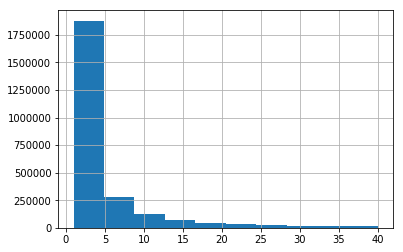

In [46]:
val[val<40].hist(bins=10)

In [47]:
# val值不应当小于0
val2 = val[(val>=0)]

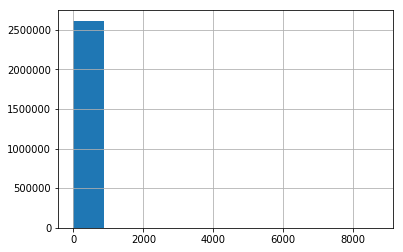

In [48]:
val2.hist(bins=10)

In [49]:
val2.describe()

count    2.612897e+06
mean     1.131389e+01
std      6.162984e+01
min      9.700001e-01
25%      1.552000e+00
50%      2.716001e+00
75%      5.820000e+00
max      8.703810e+03
Name: valu_new, dtype: float64

## 利用Box-Cox正态化

由于后期需要对数据标准化，而值的最大值、最小值不确定。所以，应当使用公式$$x^*=\frac{x-\mu}{\sigma}$$  
但由于这种方法需要数据是正态的，因此首先需要对数据正态化。Cox-Box是一种正态化方法

Box-Cox转换:  
$$y=(x^\lambda-1)/\lambda ,....\lambda \ne 0$$ 
$$y= log(x),.....\lambda=0$$

In [76]:
norm_val,lam = stats.boxcox(val2)

In [80]:
"""
Cox-Box转化中 lambda的值：

"""
print("lambda's value is",lam)

lambda's value is -0.597341945610265


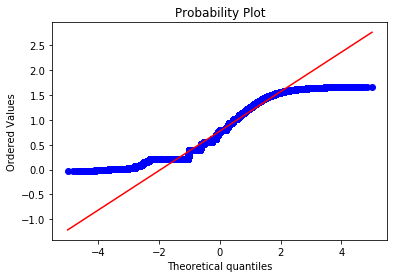

In [78]:
"""
画出正态概率图/ q-q图

"""
prob = stats.probplot(norm_val,dist=stats.norm,plot = plt)

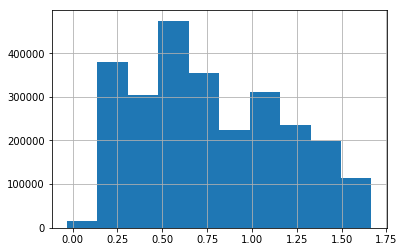

In [79]:
pd.Series(norm_val).hist()

In [117]:
sum(norm_val<0)

352

In [152]:
"""
当val2的值小于1时，norm_val的值会小于0

"""
#如：
lam = -0.597341945610265
print((0.5**lam-1)/lam)

-0.8586816150216124


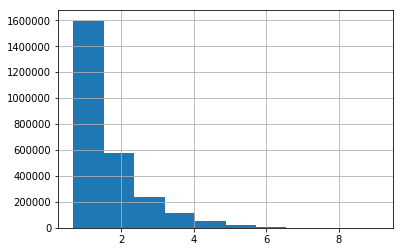

In [120]:
pd.Series(np.log(val2+1)).hist()

In [115]:
sum(val2<1)

352

## 标准化

## Z-score转换

In [145]:
from sklearn.preprocessing import scale

In [146]:
scale_val = scale(norm_val)

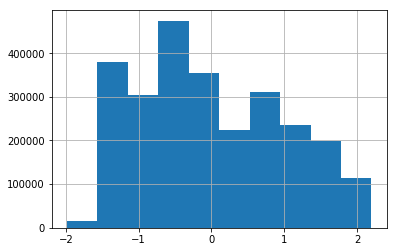

In [138]:
pd.Series(scale_val).hist()

In [139]:
print("均值是：{0:0.3}".format(scale_val.mean()))
print("均值是：{}".format(round(sacle_val.mean(),3)))

均值是：1.11e-16
均值是：0.0


In [140]:
print("标准差是：{0:0.3}".format(scale_val.std()))
print("标准差是：{}".format(round(sacle_val.std(),3)))

标准差是：1.0
标准差是：1.0


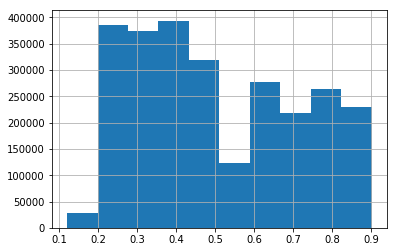

In [150]:
"""
由于数据不是在[0-1]之间，因此Sigmoid一下
"""
sig_scale_val = 1/(1+np.exp(-scale_val))
pd.Series(sig_scale_val).hist()

In [ ]:
"""
范围在0.1-0.9之间 区分度比较不错

"""

## Log转换

 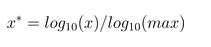

In [128]:
log_val = np.log10(val2)/np.log10(max(val2))

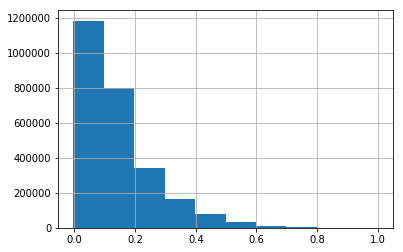

In [130]:
log_val.hist()

In [ ]:
"""
效果有点差，且需要求最大值
"""

## atan函数转换

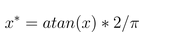

In [148]:
"""
需要输入的数据大于0
"""




'\n需要输入的数据大于0\n'

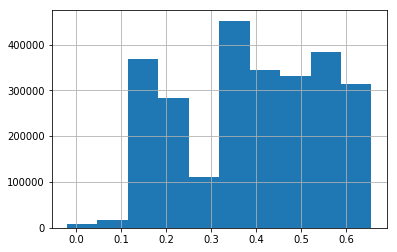

In [149]:
atan_val = np.arctan(norm_val)*(2/math.pi)
pd.Series(atan_val).hist()

## 直接sigmoid转换

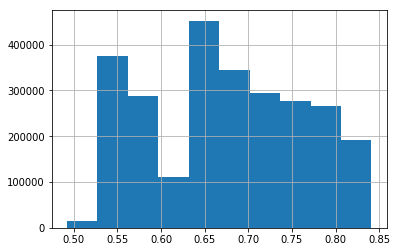

In [151]:
sig_val = 1/(1+np.exp(-norm_val))
pd.Series(sig_val).hist()

In [ ]:
"""



范围在0.5-0.85之间 区分度好像有点小



"""

## Min-Max转换

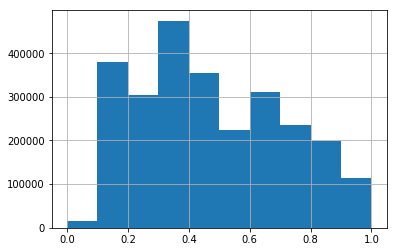

In [156]:
min_max_val = (norm_val-min(norm_val))/(max(norm_val)-min(norm_val))
pd.Series(min_max_val).hist()

In [ ]:
"""
区分度在0-1之间 比较好  但是需要求min max值

"""

## 直接Z-score化

In [30]:
print(val2.mean())
print(val2.std())

11.313888945151064
61.62983813368707


In [31]:
val3 = (val2-val2.mean())/val2.std()

In [33]:
val3.describe()

count    2.612897e+06
mean    -1.177674e-12
std      1.000000e+00
min     -1.678390e-01
25%     -1.583955e-01
50%     -1.395085e-01
75%     -8.914333e-02
max      1.410436e+02
Name: valu_new, dtype: float64

In [35]:
val3.quantile(0.05)

-0.16311723751966375

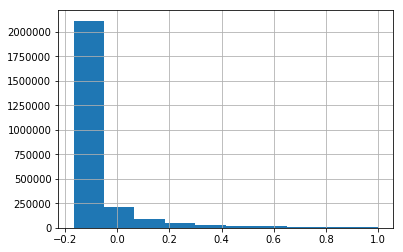

In [36]:
val3[(val3<1)&(val3>-0.17)].hist()

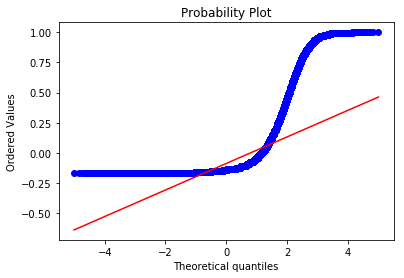

In [38]:
prob = stats.probplot(val3[(val3<1)&(val3>-0.17)],dist=stats.norm,plot = plt)

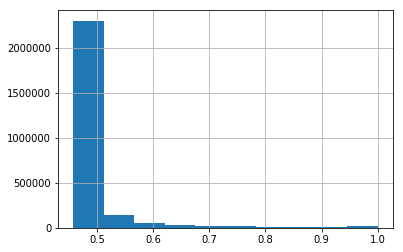

In [39]:
sig_val3 = 1/(1+np.exp(-val3))
pd.Series(sig_val3).hist()

## 标准化方法

In [50]:
val2.describe()

count    2.612897e+06
mean     1.131389e+01
std      6.162984e+01
min      9.700001e-01
25%      1.552000e+00
50%      2.716001e+00
75%      5.820000e+00
max      8.703810e+03
Name: valu_new, dtype: float64

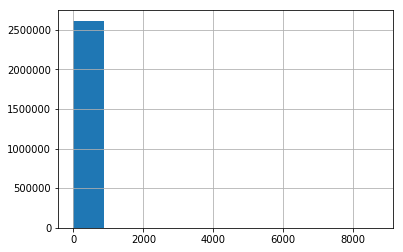

In [51]:
val2.hist()

In [52]:
val2.quantile(0.95)

37.05395635

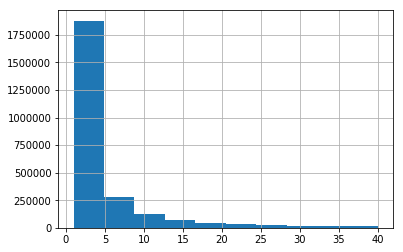

In [54]:
val2[val2<40].hist()

In [55]:
ln_val2 = np.log(val2)

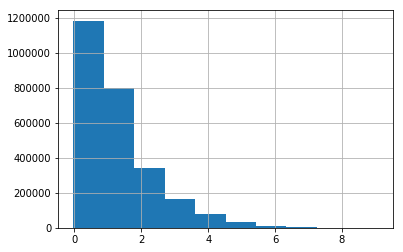

In [56]:
ln_val2.hist()

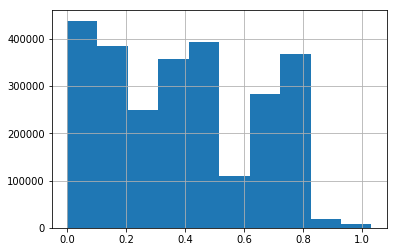

In [57]:
inv_val2 = 1/val2
inv_val2.hist()

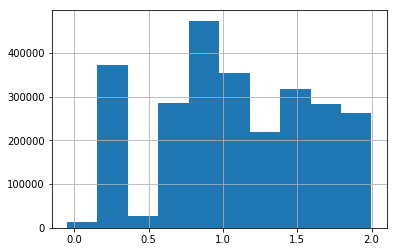

In [68]:
inv_val2_2 = 2*(1- 1/(val2**0.8))
inv_val2_2.hist()

In [69]:
minmax_inv_val2_2 =(inv_val2_2-min(inv_val2_2))/(max(inv_val2_2)-min(inv_val2_2))

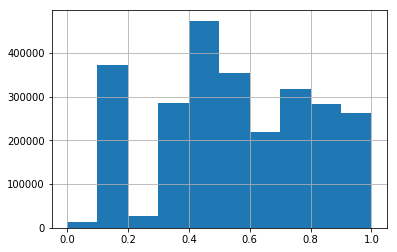

In [70]:
minmax_inv_val2_2.hist()

In [71]:
minmax_inv_val2_2.describe()

count    2.612897e+06
mean     5.543994e-01
std      2.473260e-01
min      0.000000e+00
25%      3.136154e-01
50%      5.615795e-01
75%      7.620295e-01
max      1.000000e+00
Name: valu_new, dtype: float64

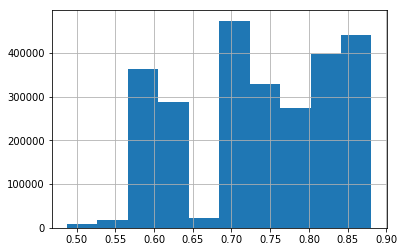

In [72]:
sig_inv_val2_2 = 1/(1+np.exp(-inv_val2_2))
sig_inv_val2_2.hist()